## Dev env configuration

In [1]:
# install the required python packages
# !pip install numpy pandas yfinance matplotlib mplfinance seaborn

## Imports

In [2]:
# import the necessary packages
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import yfinance as yf

## Fetch market data

In [3]:
# set the start and end dates for our market data request to be TTM
end_date = datetime(year=2025, month=3, day=1)
start_date = end_date - timedelta(days=365)

# set the name of the ticker we want to download market data for
ticker = "AAPL"

In [4]:
# download market data
df = yf.download(
    tickers=ticker,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=False
)

# restructure the default multi-index dataframe to our preferred format
df = df.stack(level="Ticker", future_stack=True)
df.index.names = ["Date", "Symbol"]
df = df[["Open", "High", "Low", "Close", "Volume"]]
df = df.swaplevel(0, 1)
df = df.sort_index()
df

Price                    Open        High         Low       Close    Volume
Symbol Date                                                                
AAPL   2024-03-01  178.706190  179.681580  176.546390  178.815674  73488000
       2024-03-04  175.322153  176.068628  172.973243  174.277100  81510100
       2024-03-05  169.957487  171.231471  168.822845  169.320496  95132400
       2024-03-06  170.256065  170.435227  167.887245  168.325180  68587700
       2024-03-07  168.355038  169.927615  167.698152  168.205750  71765100
...                       ...         ...         ...         ...       ...
       2025-02-24  244.929993  248.860001  244.419998  247.100006  51326400
       2025-02-25  248.000000  250.000000  244.910004  247.039993  48013300
       2025-02-26  244.330002  244.979996  239.130005  240.360001  44433600
       2025-02-27  239.410004  242.460007  237.059998  237.300003  41153600
       2025-02-28  236.949997  242.089996  230.199997  241.839996  56796200

[250 rows x 5 columns]

## Basic line plot of closing prices

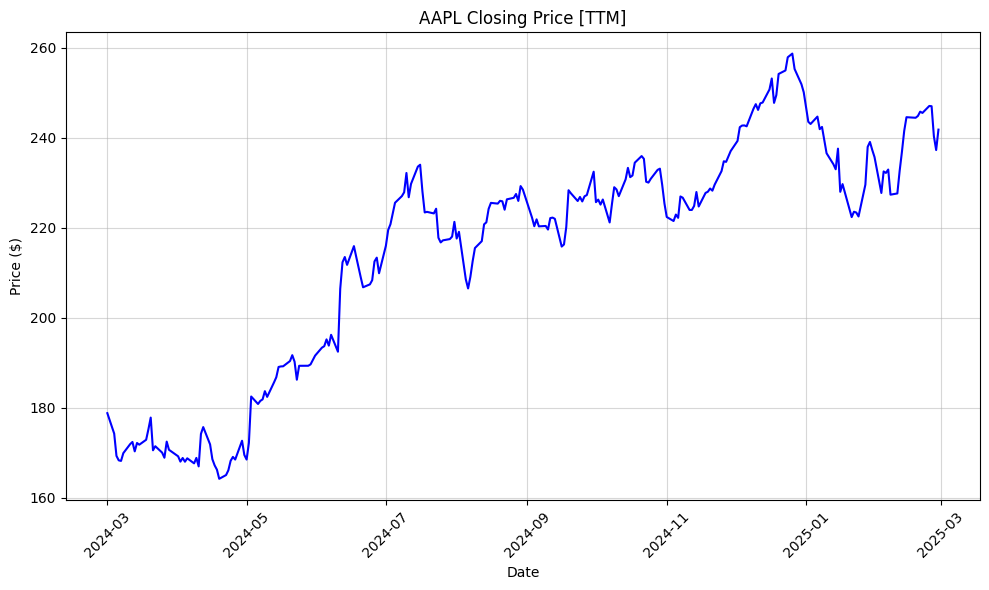

In [5]:
# initialize an empty figure
plt.figure(figsize=(10, 6))
plt.grid(alpha=0.5)

# plot the closing prices
plt.plot(
    df.xs(ticker).index,
    df.xs(ticker)["Close"],
    color="blue",
    linewidth=1.5
)

# set the plot title and axis labels
plt.title(f"{ticker} Closing Price [TTM]")
plt.xlabel("Date")
plt.ylabel("Price ($)")

# finish constructing the plot
plt.xticks(rotation=45)
plt.tight_layout()

# show the plot
plt.show()

## Plotting candlestick chart of OHLC data



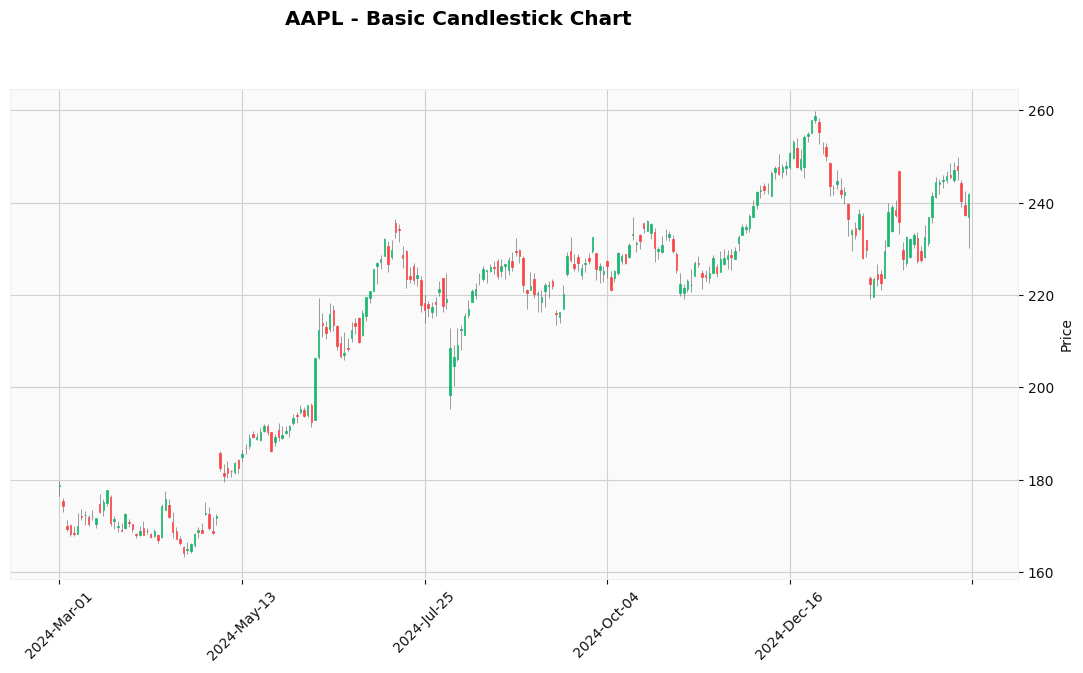

In [6]:
# plot the open, high, low, and close candlestick data
mpf.plot(
    df.xs(ticker),
    type="candle",
    style="yahoo",
    figsize=(14, 7),
    title=f"{ticker} - Basic Candlestick Chart"
)

## Adding volume to the candlestick chart

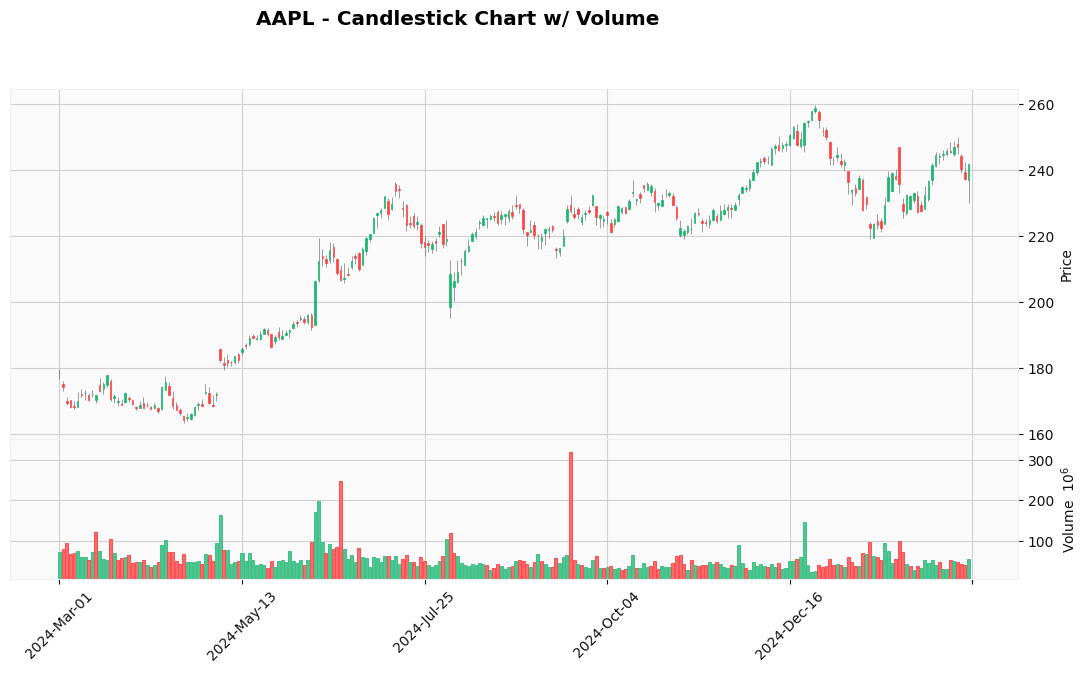

In [7]:
# include volume in the candlestick chart
mpf.plot(
    df.xs(ticker),
    type="candle",
    style="yahoo",
    figsize=(14, 7),
    volume=True,
    title=f"{ticker} - Candlestick Chart w/ Volume"
)

## Plotting only recent OHLCV data

In [8]:
# grab only the latest 30 days of trading data
df_latest = df.head(30)

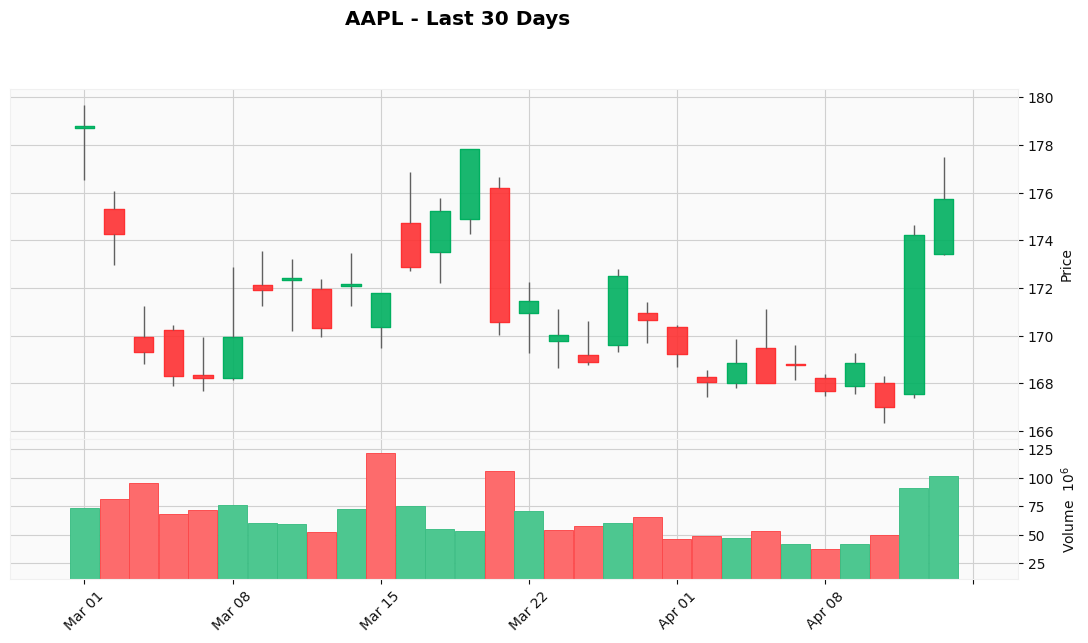

In [9]:
# plot the latest data, thereby creating a "zoomed in" version of the plot
mpf.plot(
    df_latest.xs(ticker),
    type="candle",
    style="yahoo",
    figsize=(14, 7),
    volume=True,
    title=f"{ticker} - Last 30 Days"
)